# Extreme benchmarks

This notebook gets the most extreme benchmarks and plots them against each other.

## Compare metrics

In [1]:
from get_all_metrics import get_metrics

metrics_1_400 = list(get_metrics("../results/phase_3_400000ops_1_400"))
metrics_1_3600 = list(get_metrics("../results/phase_3_400000ops_1_3600"))
metrics_8_400 = list(get_metrics("../results/phase_3_400000ops_8_400"))
metrics_8_3600 = list(get_metrics("../results/phase_3_400000ops_8_3600"))

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import math

ax = plt.gca()
ax.xaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_minor_locator(plt.MultipleLocator(20))
metrics_1_400[0].plot(kind='line', x='Timestamp', y='ReadThroughput', ax=ax, color='blue')
metrics_1_400[1].plot(kind='line', x='Timestamp', y='ReadThroughput', ax=ax, color='blue')
metrics_1_400[2].plot(kind='line', x='Timestamp', y='ReadThroughput', ax=ax, color='blue')
metrics_1_400[3].plot(kind='line', x='Timestamp', y='ReadThroughput', ax=ax, color='blue')

metrics_1_3600[0].plot(kind='line', x='Timestamp', y='ReadThroughput', ax=ax, color='red')
metrics_1_3600[1].plot(kind='line', x='Timestamp', y='ReadThroughput', ax=ax, color='red')
metrics_1_3600[2].plot(kind='line', x='Timestamp', y='ReadThroughput', ax=ax, color='red')
metrics_1_3600[3].plot(kind='line', x='Timestamp', y='ReadThroughput', ax=ax, color='red')
plt.show()


<Figure size 640x480 with 1 Axes>

### Example boxplot

In [5]:
import pandas as pd
import numpy as np
# import seaborn as sns

# metrics_1_400[0] = metrics_1_400[0].assign(Location=1)
# metrics_1_400[1] = metrics_1_400[1].assign(Location=1)

# cdf_metrics = pd.concat([metrics_1_400[0], metrics_1_400[1]])
# mdf_metrics = pd.melt(cdf_metrics, id_vars=['Location'], var_name=['ReadThroughput'])


# data1 = pd.DataFrame(np.random.rand(17,3), columns=['A','B','C']).assign(Location=1)
# data2 = pd.DataFrame(np.random.rand(17,3)+0.2, columns=['A','B','C']).assign(Location=2)
# data3 = pd.DataFrame(np.random.rand(17,3)+0.4, columns=['A','B','C']).assign(Location=3)

# cdf = pd.concat([data1, data2, data3])    
# mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Letter'])
# print(mdf.head())

# #    Location Letter     value
# # 0         1      A  0.223565
# # 1         1      A  0.515797
# # 2         1      A  0.377588
# # 3         1      A  0.687614
# # 4         1      A  0.094116

# ax = sns.boxplot(x="Location", y="value", hue="Letter", data=mdf)    
# plt.show()

## Compare latencies

In [6]:
def get_line_with_find(lines, regex):
    for index, line in enumerate(lines):
        if line.find(regex) != -1:
            return index
    return -1


def get_percentile_latency(percentile, filename):
    file = open(filename, "r")
    lines = map(lambda line: line.rstrip('\n'), file.readlines())
    
    read_lines = list(filter(lambda line: line.find('[READ]') != -1,lines))[4:-1]
    
    specific_line = [line for line in read_lines if line.find("[READ], " + percentile) != -1][0]

    latency = specific_line.split()[-1]
    return latency

In [7]:
get_percentile_latency('95', "../results/phase_3_400000ops_1_400")

'2949'

In [8]:
def get_latency_tuple(load, threshold, filename_prefix = "../results/phase_3_400000ops_"):
    filename = filename_prefix + str(threshold) + "_" + str(load)
    latency = get_percentile_latency('99', filename)
    return (load, int(latency))

def get_latencies_for_threshold(threshold = 1, filename_prefix = "../results/phase_3_400000ops_"):
    return list(map(lambda load: get_latency_tuple(load, threshold, filename_prefix), range(400, 3600, 200)))

def print_latencies_for_threshold(threshold = 1, filename_prefix = "../results/phase_3_400000ops_"):    
    for load in range(400, 3600, 200):
        (load, latency) = get_latency_tuple(load, threshold, filename_prefix)
        print(str(load) + ":" + str(latency))

In [9]:
print_latencies_for_threshold(2)

400:7335
600:7287
800:10335
1000:9023
1200:9815
1400:10647
1600:10231
1800:9327
2000:10103
2200:9863
2400:10775
2600:10511
2800:11031
3000:10759
3200:10991
3400:10647


In [10]:
get_latency_tuple(400, 2)

(400, 7335)

In [26]:
%matplotlib notebook

<IPython.core.display.Javascript object>


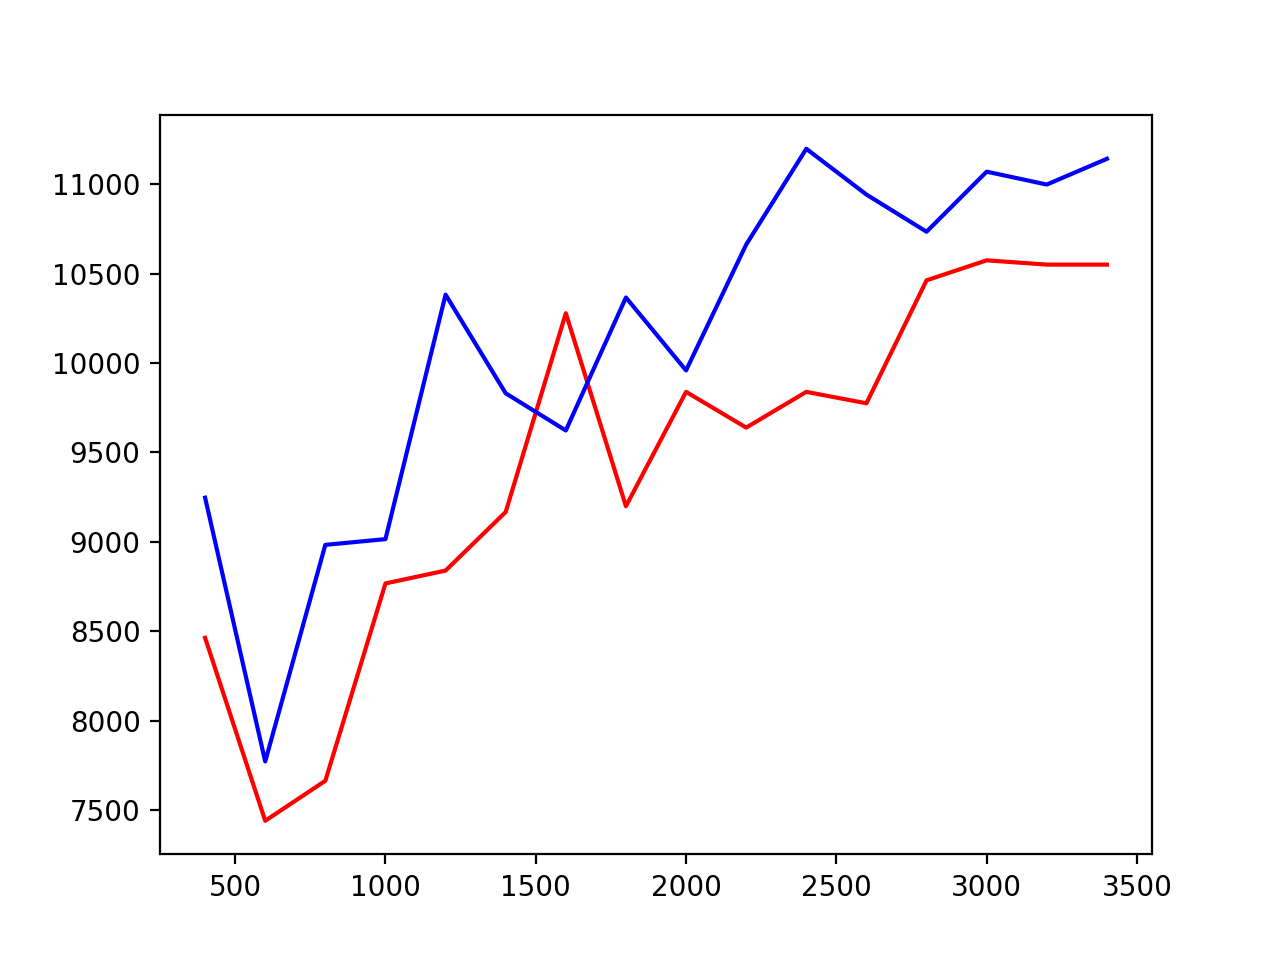

In [15]:
f, ax = plt.subplots(1)

# for i in range(1, 9, 1):
latencies = get_latencies_for_threshold(1)
latencies_arr = np.asarray(latencies)

plt.plot(latencies_arr[:,0], latencies_arr[:,1], color='r')
# ax.set_ylim(bottom=5000, top=14000)

latencies = get_latencies_for_threshold(6)
latencies_arr = np.asarray(latencies)

plt.plot(latencies_arr[:,0], latencies_arr[:,1], color='b')
# ax.set_ylim(bottom=5000, top=14000)

plt.show()

In [18]:
import itertools

def get_list_for_threshold (threshold): 
    latencies = get_latencies_for_threshold(threshold)

    thresholds = [threshold] * len(latencies)

    values = [
        (x, y, z) for ((x, z), y) in zip(latencies, thresholds)
    ]

    return values

big_list = []
for i in range(1, 9):
    big_list.append(get_list_for_threshold(i))

X, Y, Z = zip(*itertools.chain(*big_list))


X = np.array(list(X))
Y = np.array(list(Y))
Z = np.array(list(Z))

big_list

[[(400, 1, 8463),
  (600, 1, 7439),
  (800, 1, 7663),
  (1000, 1, 8767),
  (1200, 1, 8839),
  (1400, 1, 9167),
  (1600, 1, 10279),
  (1800, 1, 9199),
  (2000, 1, 9839),
  (2200, 1, 9639),
  (2400, 1, 9839),
  (2600, 1, 9775),
  (2800, 1, 10463),
  (3000, 1, 10575),
  (3200, 1, 10551),
  (3400, 1, 10551)],
 [(400, 2, 7335),
  (600, 2, 7287),
  (800, 2, 10335),
  (1000, 2, 9023),
  (1200, 2, 9815),
  (1400, 2, 10647),
  (1600, 2, 10231),
  (1800, 2, 9327),
  (2000, 2, 10103),
  (2200, 2, 9863),
  (2400, 2, 10775),
  (2600, 2, 10511),
  (2800, 2, 11031),
  (3000, 2, 10759),
  (3200, 2, 10991),
  (3400, 2, 10647)],
 [(400, 3, 9671),
  (600, 3, 7815),
  (800, 3, 10959),
  (1000, 3, 9863),
  (1200, 3, 9823),
  (1400, 3, 9799),
  (1600, 3, 9727),
  (1800, 3, 10111),
  (2000, 3, 10239),
  (2200, 3, 10647),
  (2400, 3, 10919),
  (2600, 3, 10863),
  (2800, 3, 10791),
  (3000, 3, 10735),
  (3200, 3, 11063),
  (3400, 3, 11007)],
 [(400, 4, 9895),
  (600, 4, 8131),
  (800, 4, 8599),
  (1000, 4, 947

<IPython.core.display.Javascript object>


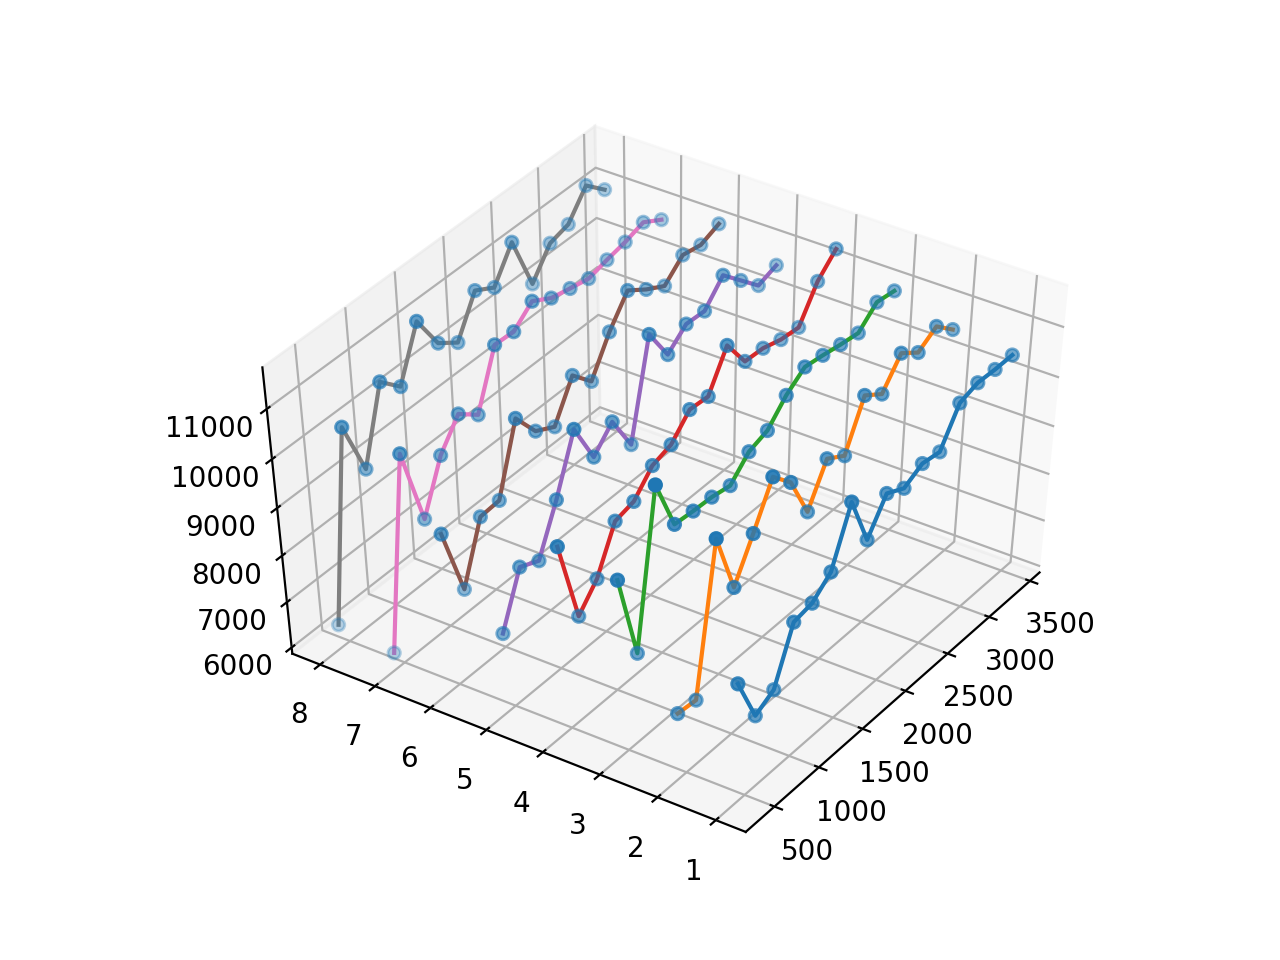

In [17]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
# X = np.arange(-5, 5, 0.25)
# Y = np.arange(-5, 5, 0.25)
# X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
# Z = np.sin(R)

# Plot the surface.
ax.scatter3D(X, Y, Z) #c=Z, cmap=cm.coolwarm 
                    #    linewidth=0, antialiased=False)

def plot_line(i):
    x, y, z = zip(*big_list[i])
    ax.plot(x, y, z)

for i in range(8):
    plot_line(i)

# # Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# # Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

<IPython.core.display.Javascript object>


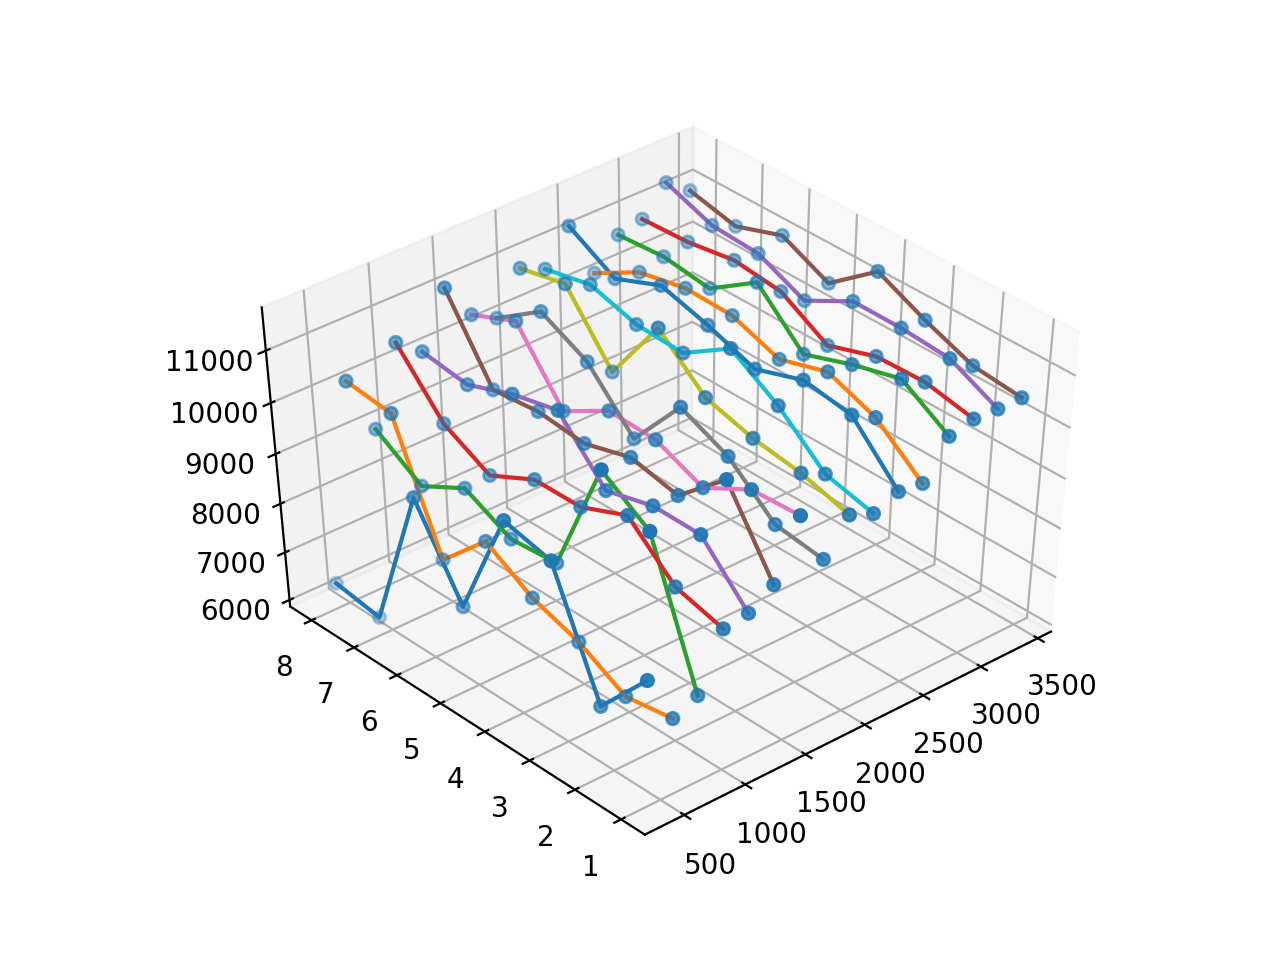

In [22]:

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
# X = np.arange(-5, 5, 0.25)
# Y = np.arange(-5, 5, 0.25)
# X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
# Z = np.sin(R)

# Plot the surface.
ax.scatter3D(X, Y, Z) #c=Z, cmap=cm.coolwarm 
                    #    linewidth=0, antialiased=False)

def plot_line(i):
    x = []
    y = []
    z = []
    for elem in big_list:
        e1, e2, e3 = elem[i]
        x.append(e1)
        y.append(e2)
        z.append(e3)
    ax.plot(x, y, z)

for i in range(len(big_list[0])):
    plot_line(i)

# # Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# # Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

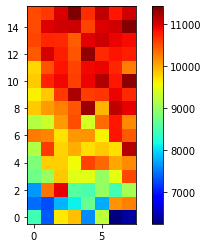

In [27]:
color_map = []

for i in range(len(big_list[0])):
    z = []
    for elem in big_list:
        _e1, _e2, e3 = elem[i]
        z.append(e3)
    color_map.append(z)
    
import numpy as np
import matplotlib.pyplot as p
%matplotlib inline
p.imshow(color_map,interpolation='none',cmap=p.cm.jet,origin='lower')  
# many other colormaps can be seen here: http://matplotlib.org/examples/color/colormaps_reference.html
p.colorbar()